<a href="https://colab.research.google.com/github/matherdy/Ukraine-War-Reserach/blob/master/Text_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6bba8bba4cbdd97b1ffb97bccfda5581eda72351990bad98e7254b073709fd93
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 46.9 MB/s 
     |████████████████████████████████| 596 kB 58.1 MB/s 
     |████████████████████████████████| 101 kB 15.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install tomotopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.3 MB 5.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tomotopy as tp
tqdm.pandas()



In [ ]:
twitter_data = pd.read_csv("/content/drive/Shareddrives/Dylan/Data/Twitter_Data/all_tweets_test_2.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
twitter_data = twitter_data.dropna(subset = ["text","created_at"])
twitter_data = twitter_data.drop_duplicates(subset='text', keep="first")

In [ ]:
twitter_data["Search_Key-Words"].value_counts()

ukraine                33501
putin+war              32683
russia+war             28579
green+energy           27617
russia                 26550
ukraine+oil            21747
russia+invasion        20204
zelenskyy              18925
NATO                   17748
natural+gas            16227
ukraine+energy         14848
putin                  14673
putin+oil              11185
putin+energy            7010
war+energy              6583
zelenskyy+war           5472
stock+energy            2878
ukraine+stock           2513
russia+stock            2013
war+stock               1949
ukriane                 1458
putin+stock              476
kyiv+oil                 369
russia+natural+gas       168
kyiv+energy              163
ukraine+natural+gas       43
kyiv+stock                38
zelenskyy+energy          21
zelenskyy+oil             21
zelenskyy+stock            5
Name: Search_Key-Words, dtype: int64

In [ ]:

import torch
device = torch.device("cuda")
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
from torch.utils.data import DataLoader
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL).to(device)

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:

#model.save_pretrained(MODEL)
text = '@John68Richmond @JaneSeyd @NorthShoreNews Thank goodness not all nato nations/cities think that way. Someone has to keep the deterrent alive. Otherwise Putins if the world might actually use tactical small yield weapons.'
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt').to(device) # this had to be coppied to the GPU for the model to work
output = model(**encoded_input)
scores = output[0][0].detach().cpu().numpy() #This is copying the results back to the CPU for output
scores = softmax(scores)
# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)
# text = "Covid cases are increasing fast!"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)
# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) Negative 0.6195
2) Neutral 0.3366
3) Positive 0.044


In [ ]:
tokenized_data = twitter_data.copy()

tokenized_data["tokens"] = tokenized_data["text"].progress_apply(tokenizer(return_tensors='pt'))

TypeError: ignored

In [ ]:
#figure out how to batch load text data into GPU for much faster processing

def get_sentiment(text):
  
  text = preprocess(text)
  encoded_input = tokenizer(text, return_tensors='pt').to(device) #This is a vector for one tweet and I want to change it to an array with many tweets
  output = model(**encoded_input)
  scores = output[0][0].detach().cpu().numpy()
  scores = softmax(scores) # This would also output an array of scores of each of the tweets
  ranking = np.argsort(scores)
  ranking = ranking[::-1]
  sentiment = [-1,0, "Positive"]
  return (ranking[0]-1,scores[ranking[0]])


get_sentiment('@dcexaminer Because our dear leaders here in der Vest have gotten it right so many times before...\nhttps://t.co/5A48os1L9s\nhttps://t.co/BzzTx5Cf1g\nhttps://t.co/rfLwmdvKXy\n🤷\u200d♂️')

(1, 0.5941224)

In [ ]:
samp = twitter_data.sample(1)
print(samp["text"].head())

encoded_input = tokenizer(list(samp["text"]),return_tensors = "pt", padding =True,truncation=True)
encoded_input

179418    @AnkitKu31686452 @ZelenskyyUa @ReallySwara @U2...
Name: text, dtype: object


{'input_ids': tensor([[    0,  1039,  4688, 23199, 43158, 35092,  5334, 36720,   787,  1301,
           523,  1290,  4122,   219,   791,   102,   787, 30327, 15417,  1742,
           787,   791,  1978,  1215,  7354,  1215,  4324,  3945,    47, 16881,
           116,    85,    17,    27,    29,    62,     7,   798,     7,   912,
             5,   997,     6,    45,  4174,     4,  4174,    40,  4538,    25,
           251,    25,    24,  1239,   142,    24,    17,    27,    29,   182,
          8066,    16,  3711,     4,   178,    47,   218,    17,    27,    90,
            33,     7,   206,    59,  4174,  1169,     4,   166,    36,  7110,
             9,     5,   232,    43,    40,   432,    19,    24,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1,

In [ ]:

samp_data = twitter_data.sample(80000)

samp_data["sentiment"] = samp_data["text"].progress_apply(get_sentiment)


  0%|          | 0/80000 [00:00<?, ?it/s]

In [ ]:
from google.colab import files
#samp_data.to_csv("samp_twitter_sentiment.csv", encoding = 'utf-8-sig')
#files.download('samp_twitter_sentiment.csv')

sentiment_data = pd.read_csv("/content/drive/Shareddrives/Dylan/Data/Twitter_Data/samp_twitter_sentiment-2.csv")

In [ ]:
sentiment_data['created_at_2'] = sentiment_data["created_at"].progress_apply(pd.to_datetime)

  0%|          | 0/79996 [00:00<?, ?it/s]

In [ ]:
from nltk.tokenize.casual import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles=True, preserve_case=False)

In [ ]:
twitter_data["tokens"] = twitter_data['text'].progress_apply(tokenizer.tokenize)

  0%|          | 0/315667 [00:00<?, ?it/s]

In [ ]:
#from nltk.corpus import stopwords
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
from nltk.stem.porter import PorterStemmer
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

stop_words = stop_words + [".","(",")",",","/",":",";","&"]
#stop_words = list(stopwords.words('english')) + [".","!","(",")",",","/",":",";","&"]
#print(stop_words + [".","!","(",")",","])




for index, row_series in twitter_data.iterrows():
    twitter_data.at[index , "tokens"] = [p_stemmer.stem(word) for word in row_series["tokens"] if not word in stop_words]

KeyError: ignored

In [ ]:
k = 40
min_df = 500
rm_top = 10
tw = tp.TermWeight.ONE
alpha = 0.1
eta = 0.01
tol = 1e-3


In [ ]:
%%time

mdl = tp.LDAModel(k=k, min_df=min_df, rm_top=rm_top, tw=tw, alpha=alpha, eta=eta)

for doc in twitter_data['tokens']:
    if doc:
        mdl.add_doc(doc)

last = np.NINF
for i in range(0, 5000, 50):
    mdl.train(50)
    ll = mdl.ll_per_word
    print(f'{i:5d} LL = {ll:7.4f}', flush=True)
    if ll - last < tol:
        break
    else:
        last = ll

print(f'Done!')

    0 LL = -7.3736
   50 LL = -7.2309
  100 LL = -7.1873
  150 LL = -7.1619
  200 LL = -7.1451
  250 LL = -7.1322
  300 LL = -7.1228
  350 LL = -7.1101
  400 LL = -7.1057
  450 LL = -7.1029
  500 LL = -7.1008
  550 LL = -7.0980


KeyboardInterrupt: ignored

In [ ]:

for k in range(mdl.k):
    print(f'{k:3d} ', ', '.join(s for s,_ in mdl.get_topic_words(k)))

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pyLDAvis

topic_term_dists = np.stack([mdl.get_topic_word_dist(k)
                             for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs)
term_frequency = mdl.used_vocab_freq
prepared_data = pyLDAvis.prepare(topic_term_dists,
                                 doc_topic_dists,
                                 doc_lengths,
                                 vocab,
                                 term_frequency, 
                                 mds='tsne', 
                                 sort_topics=False
                                 )

pyLDAvis.display(prepared_data)

In [ ]:
sentiment_data["tokens"] = sentiment_data['text'].progress_apply(tokenizer.tokenize)

  0%|          | 0/80000 [00:00<?, ?it/s]

In [ ]:
#from nltk.corpus import stopwords
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
from nltk.stem.porter import PorterStemmer
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

stop_words = stop_words + [".","(",")",",","/",":",";","&"]
#stop_words = list(stopwords.words('english')) + [".","!","(",")",",","/",":",";","&"]
#print(stop_words + [".","!","(",")",","])


for index, row_series in sentiment_data.iterrows():
    sentiment_data.at[index , "tokens"] = [word for word in row_series["tokens"] if not word in stop_words]

In [ ]:
%%time

mdl_sent = tp.LDAModel(k=k, min_df=min_df, rm_top=rm_top, tw=tw, alpha=alpha, eta=eta)

for doc in sentiment_data['tokens']:
    if doc:
        mdl.add_doc(doc)

last = np.NINF
for i in range(0, 5000, 50):
    mdl_sent.train(50)
    ll = mdl_sent.ll_per_word
    print(f'{i:5d} LL = {ll:7.4f}', flush=True)
    if ll - last < tol:
        break
    else:
        last = ll

print(f'Done!')

In [ ]:
for k in range(mdl_sent.k):
    print(f'{k:3d} ', ', '.join(s for s,_ in mdl_sent.get_topic_words(k)))

In [ ]:
topic_term_dists = np.stack([mdl_sent.get_topic_word_dist(k)
                             for k in range(mdl_sent.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl_sent.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl_sent.docs])
vocab = list(mdl_sent.used_vocabs)
term_frequency = mdl_sent.used_vocab_freq
prepared_data = pyLDAvis.prepare(topic_term_dists,
                                 doc_topic_dists,
                                 doc_lengths,
                                 vocab,
                                 term_frequency, 
                                 mds='tsne', 
                                 sort_topics=False
                                 )

pyLDAvis.display(prepared_data)

In [ ]:

mdl_load = tp.LDAModel.load("/content/drive/Shareddrives/Dylan/Data/ukraine_topics.bin")
for k in range(mdl_load.k):
    print(f'{k:3d} ', ', '.join(s for s,_ in mdl_load.get_topic_words(k)))

  0  zelenskyy, president, ukraine, kyiv, u, ukrainian, volodymyr, visit, secretary, officials
  1  energy, green, clean, renewable, power, new, climate, ’, world, solar
  2  $, stock, =, energy, %, billion, million, like, -, 1
  3  oil, ukraine, russian, embargo, russia, help, stop, ukrainians, buying, continues
  4  war, may, putin, ukraine, day, russia, victory, world, -, could
  5  oil, war, energy, ukraine, prices, inflation, food, global, high, crisis
  6  oil, *, russian, eu, ukraine, ban, sanctions, war, #ukraine, -
  7  gas, natural, russia, poland, supplies, bulgaria, energy, cut, europe, european
  8  war, russia, ukraine, putin, russian, crimes, people, ukrainian, russians, ukrainians
  9  ", ..., ukraine, russia, war, russian, said, putin, -, new
 10  “, ”, ’, said, russia, ukraine, …, putin, war, invasion
 11  ?, russia, ukraine, putin, think, war, like, would, ..., going
 12  ukraine, russia, invasion, russian, ’, russia's, since, military, war, ukrainian
 13  germany, ’

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pyLDAvis

topic_term_dists = np.stack([mdl_load.get_topic_word_dist(k)
                             for k in range(mdl_load.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl_load.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl_load.docs])
vocab = list(mdl_load.used_vocabs)
term_frequency = mdl_load.used_vocab_freq
prepared_data = pyLDAvis.prepare(topic_term_dists,
                                 doc_topic_dists,
                                 doc_lengths,
                                 vocab,
                                 term_frequency, 
                                 mds='tsne', 
                                 sort_topics=False
                                 )

pyLDAvis.display(prepared_data)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
topics = pd.DataFrame({'label':np.nan,
                       'words':[', '.join(s for s,_ in mdl_load.get_topic_words(k)) 
                                for k in range(mdl_load.k)]},
                      index=range(mdl_load.k))
topics



,label,words
0,NaN,"zelenskyy, president, ukraine, kyiv, u, ukrain..."
1,NaN,"energy, green, clean, renewable, power, new, c..."
2,NaN,"$, stock, =, energy, %, billion, million, like..."
3,NaN,"oil, ukraine, russian, embargo, russia, help, ..."
4,NaN,"war, may, putin, ukraine, day, russia, victory..."
5,NaN,"oil, war, energy, ukraine, prices, inflation, ..."
6,NaN,"oil, *, russian, eu, ukraine, ban, sanctions, ..."
7,NaN,"gas, natural, russia, poland, supplies, bulgar..."
8,NaN,"war, russia, ukraine, putin, russian, crimes, ..."
9,NaN,""", ..., ukraine, russia, war, russian, said, p..."


In [ ]:
sentiment_data = sentiment_data[sentiment_data["tokens"].map(len) !=0]

In [ ]:
topics = pd.read_csv('/content/drive/Shareddrives/Dylan/Data/topics.csv')
topics

,label,words
0,Ukraine,"zelenskyy, president, ukraine, kyiv, u, ukrain..."
1,Green Energy,"energy, green, clean, renewable, power, new, c..."
2,Stocks,"$, stock, =, energy, %, billion, million, like..."
3,Energy,"oil, ukraine, russian, embargo, russia, help, ..."
4,War,"war, may, putin, ukraine, day, russia, victory..."
5,Energy,"oil, war, energy, ukraine, prices, inflation, ..."
6,Energy,"oil, *, russian, eu, ukraine, ban, sanctions, ..."
7,Energy,"gas, natural, russia, poland, supplies, bulgar..."
8,War,"war, russia, ukraine, putin, russian, crimes, ..."
9,War,""", ..., ukraine, russia, war, russian, said, p..."


In [ ]:
sentiment_data['docs'] = [mdl_load.make_doc(words=toks) for toks in sentiment_data['tokens']]
topic_dist, ll = mdl_load.infer(sentiment_data['docs'])

In [ ]:
import re
sentiment_data["sentiment_value"] = sentiment_data["sentiment"].apply(lambda x: re.findall('-?\d+\.?\d*',x))
sentiment_data["sentiment_value"] = sentiment_data["sentiment_value"].apply(lambda x: float(x[0]) * float(x[1]))

<input>:2: DeprecationWarning: invalid escape sequence \d
<input>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-20-d29df05d614d>:2: DeprecationWarning: invalid escape sequence \d
  sentiment_data["sentiment_value"] = sentiment_data["sentiment"].apply(lambda x: re.findall('-?\d+\.?\d*',x))


In [ ]:
sentiment_data.drop(['Unnamed: 0.1', 'Unnamed: 0',],axis = 1,inplace =True)

In [ ]:
sentiment_data["topic"] = sentiment_data["docs"].progress_apply(lambda x: x.get_topics(top_n=1)[0])

  0%|          | 0/79996 [00:00<?, ?it/s]

In [ ]:

sentiment_data['topic_name'] = sentiment_data["topic"].apply(lambda x: topics["label"][x[0]])

In [ ]:
sentiment_data.head()

,tweet_id,text,created_at,retweets,favorites,Search_Key-Words,sentiment,tokens,docs,sentiment_value,topic,topic_name
0,1521912056265465861,Russia daily bombs the territory of Ukraine in...,2022-05-04 17:58:04+00:00,1.0,1.0,ukraine,"(-1, 0.9415012)","[russia, daily, bombs, territory, ukraine, ord...","(russia, daily, bombs, territory, ukraine, ord...",-0.941501,"(8, 0.7403359413146973)",War
1,1520152221761126400,I swear to fucking god mouthbreathers on this ...,2022-04-29 21:25:07+00:00,0.0,1.0,ukraine+energy,"(-1, 0.94863486)","[swear, fucking, god, mouthbreathers, site, ne...","(swear, fucking, god, mouthbreathers, site, ne...",-0.948635,"(18, 0.4991638958454132)",War
2,1521596935584600064,The complex effort to hold Vladimir Putin acco...,2022-05-03 21:05:54+00:00,0.0,1.0,putin+war,"(0, 0.53680235)","[complex, effort, hold, vladimir, putin, accou...","(complex, effort, hold, vladimir, putin, accou...",0.000000,"(16, 0.7698090672492981)",Leaders
3,1521361803476828160,What You Missed This Week in EVs and Clean Ene...,2022-05-03 05:31:34+00:00,0.0,0.0,stock+energy,"(0, 0.8392952)","[missed, week, evs, clean, energy, https://t.c...","(missed, week, evs, clean, energy, $, tsla, $,...",0.000000,"(2, 0.7573668956756592)",Stocks
4,1519224592497352704,"Russia's state-run energy company, Gazprom, cu...",2022-04-27 07:59:03+00:00,0.0,0.0,natural+gas,"(0, 0.55743986)","[russia's, state-run, energy, company, gazprom...","(russia's, state-run, energy, company, gazprom...",0.000000,"(7, 0.4720194637775421)",Energy


In [ ]:
sentiment_dict = {}
for topic in sentiment_data["topic_name"].unique():
    sentiment_dict[topic] = sentiment_data[sentiment_data["topic_name"] == topic]["sentiment_value"].mean()
    

sentiment_dict

{'Countries': -0.3772868991340073,
 'Energy': -0.29921097420611686,
 'Green Energy': 0.03313248403686503,
 'Hashtag': -0.3138567982466997,
 'Leaders': -0.39890200601763864,
 'NATO': -0.3993214892383785,
 'Stocks': 0.07740317287985868,
 'Ukraine': -0.07111747795245814,
 'War': -0.3840265244180037}

In [ ]:
import matplotlib.pyplot as plt

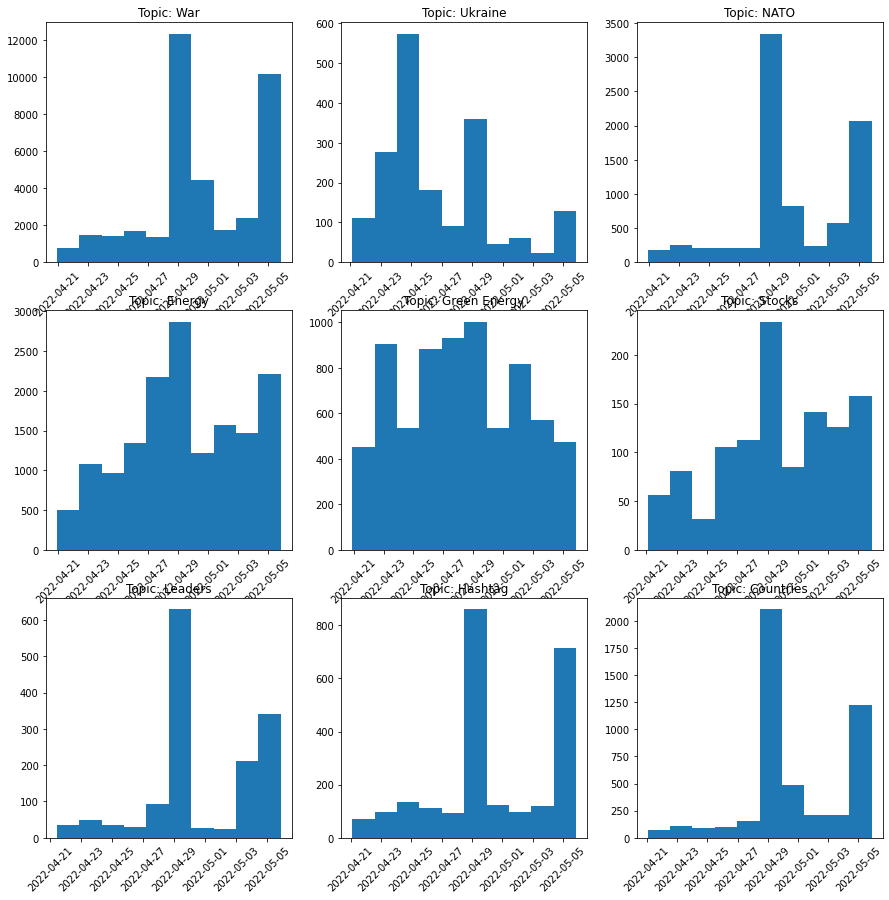

In [ ]:
fig = plt.figure(figsize = (15,15))
plt.tight_layout()

plt.subplot(331)
plt.hist(sentiment_data[sentiment_data["topic_name"] == "War"]["created_at_2"])
plt.title("Topic: War")
plt.xticks(rotation = 45)

plt.subplot(332)
plt.hist(sentiment_data[sentiment_data["topic_name"] == "Ukraine"]["created_at_2"])
plt.title("Topic: Ukraine")
plt.xticks(rotation = 45)

plt.subplot(333)
plt.hist(sentiment_data[sentiment_data["topic_name"] == "NATO"]["created_at_2"])
plt.title("Topic: NATO")
plt.xticks(rotation = 45)

plt.subplot(334)
plt.hist(sentiment_data[sentiment_data["topic_name"] == "Energy"]["created_at_2"])
plt.title("Topic: Energy")
plt.xticks(rotation = 45)

plt.subplot(335)
plt.hist(sentiment_data[sentiment_data["topic_name"] == "Green Energy"]["created_at_2"])
plt.title("Topic: Green Energy")
plt.xticks(rotation = 45)

plt.subplot(336)
plt.hist(sentiment_data[sentiment_data["topic_name"] == "Stocks"]["created_at_2"])
plt.title("Topic: Stocks")
plt.xticks(rotation = 45)

plt.subplot(337)
plt.hist(sentiment_data[sentiment_data["topic_name"] == "Leaders"]["created_at_2"])
plt.title("Topic: Leaders")
plt.xticks(rotation = 45)

plt.subplot(338)
plt.hist(sentiment_data[sentiment_data["topic_name"] == "Hashtag"]["created_at_2"])
plt.title("Topic: Hashtag")
plt.xticks(rotation = 45)

plt.subplot(339)
plt.hist(sentiment_data[sentiment_data["topic_name"] == "Countries"]["created_at_2"])
plt.title("Topic: Countries")
plt.xticks(rotation = 45)

plt.show()